In [622]:
import math
import random
import time

import sklearn.metrics
from numpy import arange, c_
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

from scipy import optimize

import numpy as np

from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, RocCurveDisplay, roc_curve

import matplotlib.pyplot as plt

import pandas as pd



noise = 16
samples = 2425
seed = 244825
classes = 2
train_split = 0.8
test_split = 0.2
repeats = 100

In [623]:
def my_normalize(matrix):
    return (matrix - np.min(matrix))/(np.max(matrix) - np.min(matrix))

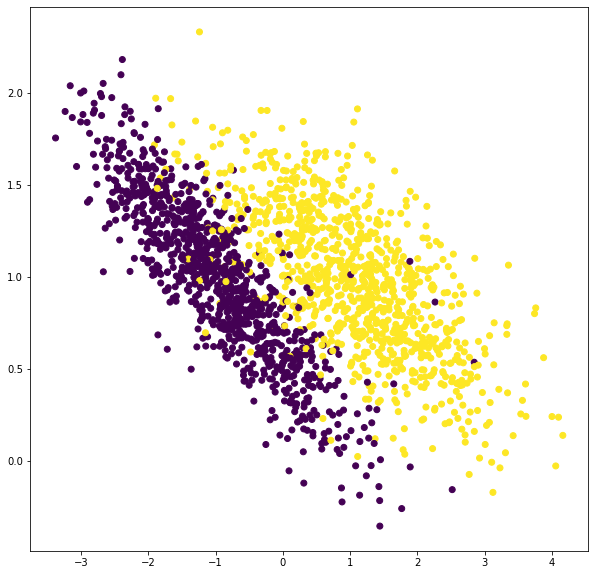

In [624]:
X, y = datasets.make_classification(n_features=2, random_state=seed, n_redundant=0, n_samples=samples, n_classes=2, n_clusters_per_class=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_split, test_size=test_split, random_state=seed)

xx, yy = np.meshgrid(np.arange(-3.25, 4.25, 0.01),
                       np.arange(-0.25, 2.25, 0.01))

# X_train = my_normalize(X_train)
# X_test = my_normalize(X_test)


plt.figure(figsize=(10,10))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

In [625]:
model = LogisticRegression()

time_sk = time.perf_counter()
model.fit(X_train, y_train.flatten())
time_sk = time.perf_counter() - time_sk
predict = model.predict(X_test)

confusion_matrix(y_test, predict)

array([[228,   7],
       [ 18, 232]], dtype=int64)

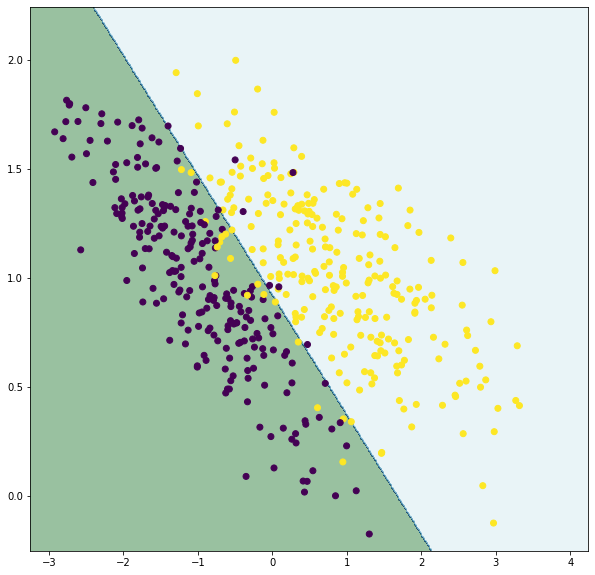

In [626]:
predict = model.predict(c_[xx.ravel(), yy.ravel()])
predict = predict.reshape(xx.shape)
plt.figure(figsize=(10, 10))
plt.contourf(xx, yy, predict, alpha=0.4, cmap='ocean')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)

iter: 0 cost: 0.49369671084578315
iter: 100 cost: 0.23259430810846135
iter: 200 cost: 0.19606358369095472
iter: 300 cost: 0.18080272874408512
iter: 400 cost: 0.17283076190291904
iter: 500 cost: 0.168115427611161
iter: 600 cost: 0.16510099706120765
iter: 700 cost: 0.16306944449319577
iter: 800 cost: 0.16164723111302015
iter: 900 cost: 0.16062273712825384
iter: 1000 cost: 0.15986820090550166
iter: 1100 cost: 0.15930260442081778
iter: 1200 cost: 0.15887252951071906
iter: 1300 cost: 0.1585416258709414
iter: 1400 cost: 0.15828450576065975
iter: 1500 cost: 0.1580830484066891
iter: 1600 cost: 0.1579240802580325
iter: 1700 cost: 0.157797873145584
iter: 1800 cost: 0.15769714575825153
iter: 1900 cost: 0.15761638424984092
iter: 2000 cost: 0.15755137054925775
iter: 2100 cost: 0.15749884899785077
iter: 2200 cost: 0.15745628700803668
iter: 2300 cost: 0.1574217008004317
iter: 2400 cost: 0.1573935269257321
iter: 2500 cost: 0.15737052647309252
iter: 2600 cost: 0.15735171292466885
iter: 2700 cost: 0.157

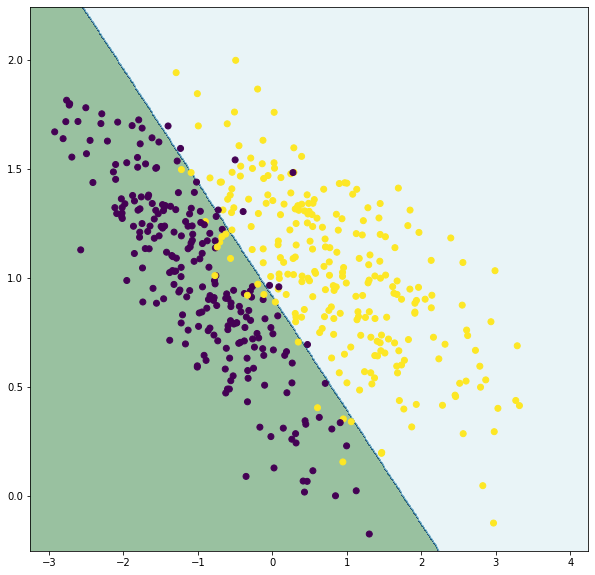

In [627]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))


def predict(x, theta):
    z = x @ theta
    return sigmoid(z)


def cost_function(features, labels, weights):
    '''
    Using Mean Absolute Error

    Features:(100,3)
    Labels: (100,1)
    Weights:(3,1)
    Returns 1D matrix of predictions
    Cost = (labels*log(predictions) + (1-labels)*log(1-predictions) ) / len(labels)
    '''
    observations = len(labels)

    predictions = predict(features, weights)

    #Take the error when label=1
    class1_cost = -labels*np.log(predictions)

    #Take the error when label=0
    class2_cost = (1-labels)*np.log(1-predictions)

    #Take the sum of both costs
    cost = class1_cost - class2_cost

    #Take the average cost
    cost = cost.mean()

    return cost


def update_weights(features, labels, weights, lr):
    '''
    Vectorized Gradient Descent

    Features:(200, 3)
    Labels: (200, 1)
    Weights:(3, 1)
    '''
    N = len(features)

    #1 - Get Predictions
    predictions = predict(features, weights)

    #2 Transpose features from (200, 3) to (3, 200)
    # So we can multiply w the (200,1)  cost matrix.
    # Returns a (3,1) matrix holding 3 partial derivatives --
    # one for each feature -- representing the aggregate
    # slope of the cost function across all observations
    gradient = np.dot(features.T,  predictions - labels)

    #3 Take the average cost derivative for each feature
    gradient /= N

    #4 - Multiply the gradient by our learning rate
    gradient *= lr

    #5 - Subtract from our weights to minimize cost
    weights -= gradient

    return weights


def compute_loss():
    pass


def decision_boundary(prob):
  return 1 if prob >= .5 else 0


def classify(predictions):
  '''
  input  - N element array of predictions between 0 and 1
  output - N element array of 0s (False) and 1s (True)
  '''
  db = np.vectorize(decision_boundary)
  return db(predictions).flatten()


def train(features, labels, weights, lr, iters):
    cost_history = []

    for i in range(iters):
        weights = update_weights(features, labels, weights, lr)

        #Calculate error for auditing purposes
        cost = cost_function(features, labels, weights)
        cost_history.append(cost)

        # Log Progress
        if i % 100 == 0:
            print("iter: "+str(i) + " cost: "+str(cost))

    return weights, cost_history


y_train = y_train.reshape(len(y_train), 1)

X_new = np.c_[np.ones([len(X_train), 1]), X_train]

theta = np.ones([X_new.shape[1], 1])
# myfs = sigmoid(X_new @ theta)
#
# ans = np.asarray(myfs)
#
# cost_function(X_new, y_train, theta)
#
# np.log(predict(X_new, theta))
#
# update_weights(X_new, y_train, theta, 0.01)

time_my = time.perf_counter()
theta, costs = train(X_new, y_train, theta, 1, 7000)
time_my = time.perf_counter() - time_my

zzz = np.c_[xx.flatten(), yy.flatten()]
zzz = np.c_[np.ones([len(xx.flatten()), 1]), zzz]

predict1 = predict(zzz, theta[:])
predict1 = classify(predict1)
predict1 = predict1.reshape(xx.shape)
plt.figure(figsize=(10, 10))
plt.contourf(xx, yy, predict1, alpha=0.4, cmap='ocean')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)

In [628]:
def accuracy(predicted_labels, actual_labels):
    diff = predicted_labels - actual_labels
    return 1.0 - (float(np.count_nonzero(diff)) / len(diff))


X_new = np.c_[np.ones([len(X_test), 1]), X_test]
prediction = predict(X_new, theta)
# prediction = [1 if x >= 0.5 else 0 for x in prediction]
prediction = classify(prediction)

print(theta)

[[-8.15632217]
 [ 4.6375355 ]
 [ 8.90106132]]


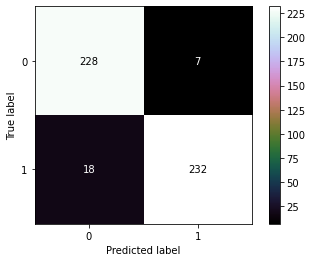

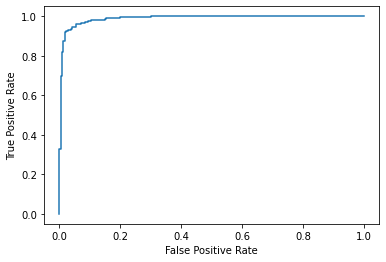

In [629]:
cm_model = confusion_matrix(y_test, model.predict(X_test))
tn_model = cm_model[0][0]
fn_model = cm_model[0][1]
tp_model = cm_model[1][1]
fp_model = cm_model[1][0]
ConfusionMatrixDisplay(cm_model).plot(cmap='cubehelix')

fpr, tpr, roc_auc = roc_curve(y_test, model.decision_function(X_test))

rok_model = RocCurveDisplay(fpr=fpr, tpr=tpr)
rok_model.plot()

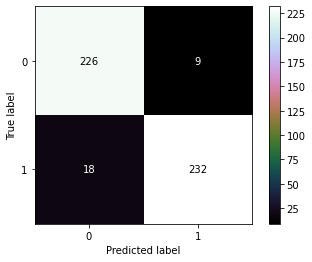

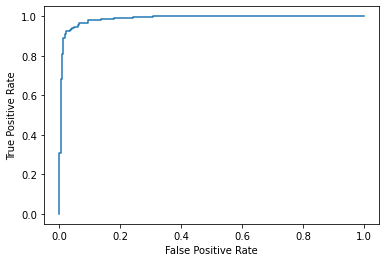

In [630]:
cm_model = confusion_matrix(y_test, prediction)
tn_my = cm_model[0][0]
fn_my = cm_model[0][1]
tp_my = cm_model[1][1]
fp_my = cm_model[1][0]
ConfusionMatrixDisplay(cm_model).plot(cmap='cubehelix')

fpr, tpr, roc_auc = roc_curve(y_test, predict(X_new, theta))

rok_analitic = RocCurveDisplay(fpr=fpr, tpr=tpr)
rok_analitic.plot()

In [631]:
print("Czas wykonania moj:", time_my)
print("Czas wykonania sklearn:", time_sk)

print("Czulosc moj:", tp_my/(tp_my + fn_my))
print("Czulosc sklearn:", tp_model/(tp_model + fn_model))

print("Swoistosc moj:", tn_my/(tn_my + fp_my))
print("Swoistosc sklearn:", tn_model/(tn_model + fp_model))

print("Accuracy moj", (tp_my + tn_my) / (tp_my + tn_my + fp_my + fn_my))
print("Accuracy sklearn", (tp_model + tn_model) / (tp_model + tn_model + fp_model + fn_model))

Czas wykonania moj: 0.7482087000098545
Czas wykonania sklearn: 0.012165299995103851
Czulosc moj: 0.9626556016597511
Czulosc sklearn: 0.9707112970711297
Swoistosc moj: 0.9262295081967213
Swoistosc sklearn: 0.926829268292683
Accuracy moj 0.9443298969072165
Accuracy sklearn 0.9484536082474226


In [632]:
australia = pd.read_csv('weatherAUS.csv')
print(len(australia.columns))
threshhold = math.floor(len(australia) * 0.7)
australia

23


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [638]:
australia = australia.dropna(axis=1, thresh=threshhold)
australia['RainTomorrow'].dropna()

australia = australia[australia['RainToday'] != 'SE']
print(len(australia.columns))
australia['RainToday'].value_counts()

19


No     109586
Yes     31201
Name: RainTomorrow, dtype: int64

In [639]:
australia.fillna(
    {
        'Location': australia['Location'].mode().values[0],
        'MinTemp': australia['MinTemp'].median(),
        'MaxTemp': australia['MaxTemp'].median(),
        'Rainfall': australia['Rainfall'].median(),
        'WindGustDir': australia['WindGustDir'].mode().values[0],
        'WindGustSpeed': australia['WindGustSpeed'].median(),
        'WindDir9am': australia['WindDir9am'].mode().values[0],
        'WindDir3pm': australia['WindDir3pm'].mode().values[0],
        'WindSpeed9am': australia['WindSpeed9am'].median(),
        'WindSpeed3pm': australia['WindSpeed3pm'].median(),
        'Humidity3pm': australia['Humidity3pm'].median(),
        'Humidity9am': australia['Humidity9am'].median(),
        'Pressure3pm': australia['Pressure3pm'].median(),
        'Pressure9am': australia['Pressure9am'].median(),
        'Temp3pm': australia['Temp3pm'].median(),
        'Temp9am': australia['Temp9am'].median(),
        'RainToday': australia['WindDir3pm'].mode().values[0]
    },
    inplace=True
)
australia

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,No,No
